### RSS RESULTS



### Logistics

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [3]:
# Load data from the text file
data = 'greedy_optimization_results.txt'  # Replace with your file path
data = pd.read_csv(data, sep='\t')
print(data.head())


   num num_robots  w  run_time selected_info_types
0              10  0      5053                  []
1              10  0      3137                  []
2              10  0      4916                  []
3              10  0      9979                  []
4              10  0      4158                  []


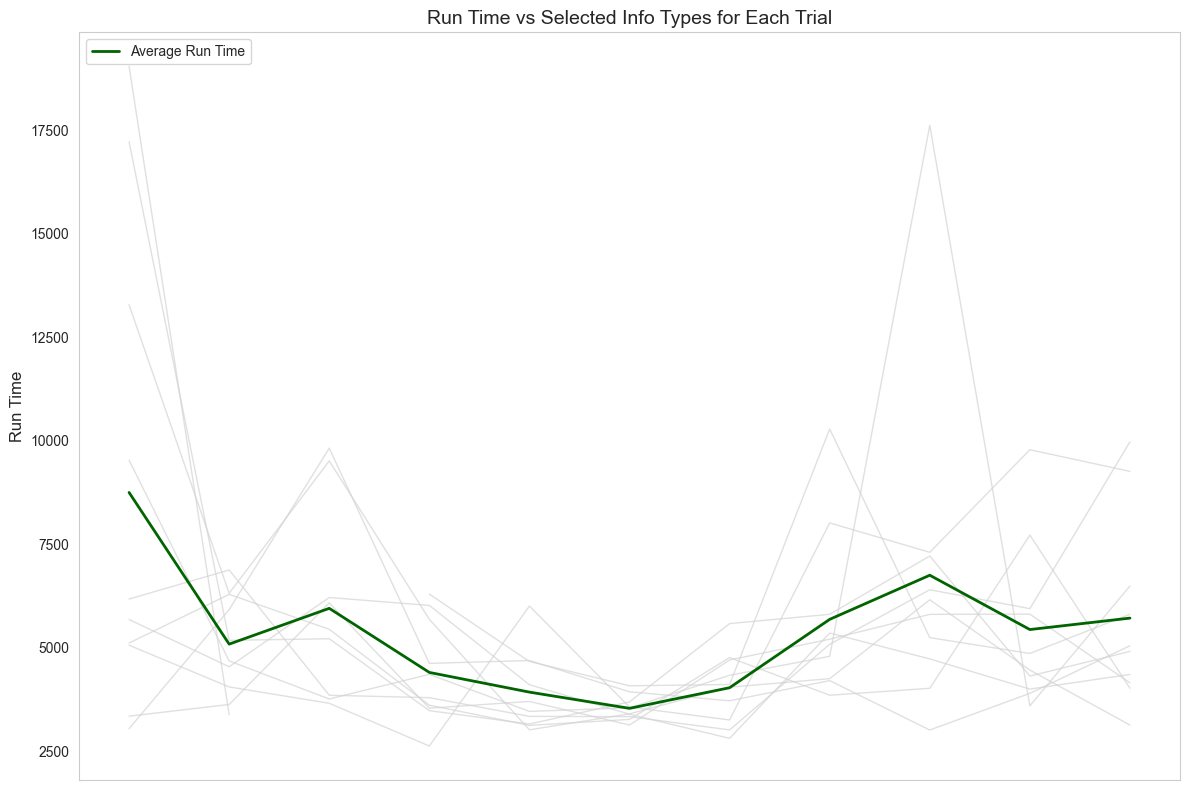

In [4]:
# Filter out rows where run_time > 50000
data = data[data['run_time'] <= 50000]

# Add a 'trial' column by assigning a unique trial number to each 'selected_info_type'
data['trial'] = data.groupby('selected_info_types').cumcount() + 1

# Sort selected_info_types to ensure consistency
data['selected_info_types'] = data['selected_info_types'].astype(str)
sorted_info_types = sorted(data['selected_info_types'].unique())

# Calculate the average run_time for each selected_info_type
average_runtime = (
    data.groupby('selected_info_types')['run_time']
    .mean()
    .reindex(sorted_info_types)
    .reset_index()
)

# Set up the plot
plt.figure(figsize=(12, 8))

# Plot light grey line plots for each trial
for trial_id in data['trial'].unique():
    subset = data[data['trial'] == trial_id]
    subset = subset.set_index('selected_info_types').reindex(sorted_info_types).reset_index()  # Ensure consistent order
    plt.plot(
        subset['selected_info_types'],
        subset['run_time'],
        color='lightgrey',
        alpha=0.7,
        linewidth=1
    )

# Plot the average line in dark green
plt.plot(
    average_runtime['selected_info_types'],
    average_runtime['run_time'],
    color='darkgreen',
    linewidth=2,
    label='Average Run Time'
)

# Customize the plot
plt.title('Run Time vs Selected Info Types for Each Trial', fontsize=14)
plt.xlabel('')  # Remove x-axis label
plt.ylabel('Run Time', fontsize=12)
plt.xticks([], fontsize=8)  # Remove x-axis tick labels
plt.yticks(fontsize=10)
plt.grid(False)  # Remove grid lines

# Add a legend for the average line
plt.legend(loc='upper left', fontsize=10)

# Adjust layout and show
plt.tight_layout()
plt.show()

In [5]:
# Filter out rows where run_time > 50000
data = data[data['run_time'] <= 50000]

# Add a column for ave_run_time (average for all data with the same selected_info_types)
data['ave_run_time'] = data.groupby('selected_info_types')['run_time'].transform('mean')

# Initialize max_ave_run_time column
data['max_ave_run_time'] = 0.0

# Calculate max_ave_run_time dynamically
max_so_far = 0
for idx, row in data.iterrows():
    max_so_far = max(max_so_far, row['ave_run_time'])
    data.loc[idx, 'max_ave_run_time'] = max_so_far

# Add a column for cost
data['cost'] = data['run_time'] / data['max_ave_run_time'] + 0.2 * data['w']

# Ensure `cost` is the last column
column_order = [col for col in data.columns if col != 'cost'] + ['cost']
data = data[column_order]

# Save the updated data to a new file
edited_file_path = 'edited_greedy_optimization_results.txt'
data.to_csv(edited_file_path, sep='\t', index=False)


In [6]:
# Filter out rows where run_time > 50000
data = data[data['run_time'] <= 50000]

# Add a column for ave_run_time (average for all data with the same selected_info_types)
data['ave_run_time'] = data.groupby('selected_info_types')['run_time'].transform('mean')

# Initialize max_ave_run_time column
data['max_ave_run_time'] = 0.0

# Calculate max_ave_run_time dynamically
max_so_far = 0
for idx, row in data.iterrows():
    max_so_far = max(max_so_far, row['ave_run_time'])
    data.loc[idx, 'max_ave_run_time'] = max_so_far

# Add a column for cost
data['cost'] = data['run_time'] / data['max_ave_run_time'] + 0.2 * data['w']

# Add a column for average_cost (average for each selected_info_types group)
data['average_cost'] = data.groupby('selected_info_types')['cost'].transform('mean')

# Ensure `cost` and `average_cost` are the last columns
column_order = [col for col in data.columns if col not in ['cost', 'average_cost']] + ['cost', 'average_cost']
data = data[column_order]

# Save the updated data to a new file
edited_file_path = 'edited_greedy_optimization_results.txt'
data.to_csv(edited_file_path, sep='\t', index=False)

# Load the updated data
file_path = 'edited_greedy_optimization_results.txt'  # Replace with your updated file path
data = pd.read_csv(file_path, sep='\t')

# Ensure selected_info_types is treated as strings and preserve the original order
data['selected_info_types'] = data['selected_info_types'].astype(str)
unique_info_types = data['selected_info_types'].drop_duplicates().tolist()

# Calculate the average cost for each selected_info_types
average_cost = (
    data.groupby('selected_info_types')['cost']
    .mean()
    .reindex(unique_info_types)
    .reset_index()
)

# Set up the plot
plt.figure(figsize=(7, 8))

# Plot light grey lines for each trial
for trial_id in data.groupby('selected_info_types').cumcount().unique():
    subset = data[data.groupby('selected_info_types').cumcount() == trial_id]
    plt.plot(
        subset['selected_info_types'],
        subset['cost'],
        color='lightgrey',
        alpha=0.7,
        linewidth=1
    )

# Plot the average cost line in dark green
plt.plot(
    average_cost['selected_info_types'],
    average_cost['cost'],
    color='darkgreen',
    linewidth=1.5,
    label='Average Cost'
)

# Customize the plot
plt.xlabel('Selected Info Types', fontsize=12)
plt.ylabel('Cost', fontsize=12)
plt.xticks(ticks=range(len(unique_info_types)), labels=unique_info_types, rotation=90, fontsize=8)
plt.yticks(fontsize=10)
plt.grid(axis='x', color='lightgrey', linestyle='--', linewidth=0.3)  # Add y-axis grid lines only
plt.grid(visible=False, axis='y')
plt.ylim(top=2.0)  # Replace `your_desired_max_value` with the maximum value you want

# Add a legend for the average line
plt.legend(['Individual Runs', 'Average Cost'], loc='upper left', fontsize=10)

# Adjust layout and show
plt.tight_layout()
plt.show()

In [7]:
he robots react to progression information by ignoring colours that are already being delivered by another robot, as signified by the sharing the progression status to the Hive.

SyntaxError: invalid syntax (3098388159.py, line 1)